# *Modelo de predicción de Machine Learning*

In [482]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from pprint import pprint
from pprint import pprint
import matplotlib.pyplot as plt
import sklearn
import random
import scipy as sp

In [483]:
# Importamos los CSV que utilizaremos.
items = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_items_dataset.csv')
product = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_products_dataset.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_reviews_dataset.csv')

In [484]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [485]:
items.head(2)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [486]:
product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [487]:
union1 = pd.merge(items, product, on = 'product_id', sort = False)

In [488]:
union1.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [489]:
union2 = pd.merge(union1, reviews, on = 'order_id', sort = False)[['product_category_name', 'price', 'review_score', 'order_id']]

<AxesSubplot: xlabel='review_score', ylabel='count'>

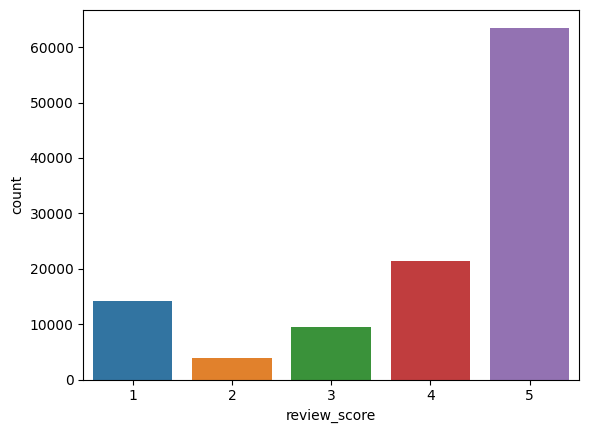

In [490]:
sns.countplot(x = 'review_score',data = union2)

In [491]:
union2.head(100)

,product_category_name,price,review_score,order_id
0,cool_stuff,58.90,5,00010242fe8c5a6d1ba2dd792cb16214
1,cool_stuff,55.90,5,130898c0987d1801452a8ed92a670612
2,cool_stuff,64.90,4,532ed5e14e24ae1f0d735b91524b98b9
3,cool_stuff,58.90,5,6f8c31653edb8c83e1a739408b5ff750
4,cool_stuff,58.90,5,7d19f4ef4d04461989632411b7e588b9
...,...,...,...,...
95,beleza_saude,59.99,5,e0d01033a569b492f76a8fc5d333cda1
96,beleza_saude,59.99,1,e5be01fc8670f32ae3555c7e35f89086
97,beleza_saude,59.99,5,f5248851770f05fc31f3915accb0bcff
98,beleza_saude,59.99,4,fbd0115d6ad4a47c2b80a49014956a0e


In [492]:
tabla_pivot = union2.pivot_table(index = 'product_category_name', values = 'review_score', aggfunc = [len, np.mean])

In [493]:
tabla_pivot.columns = ['Conteo', 'review_score']
tabla_pivot.head()

,Conteo,review_score
product_category_name,,
agro_industria_e_comercio,212,4.000000
alimentos,495,4.218182
alimentos_bebidas,279,4.315412
artes,207,3.937198
artes_e_artesanato,24,4.125000


In [494]:
tabla_pivot[tabla_pivot['Conteo'] > 98].sort_values('review_score', ascending = False)

,Conteo,review_score
product_category_name,,
livros_interesse_geral,549,4.446266
construcao_ferramentas_ferramentas,99,4.444444
livros_tecnicos,266,4.368421
alimentos_bebidas,279,4.315412
malas_acessorios,1088,4.315257
fashion_calcados,261,4.233716
alimentos,495,4.218182
papelaria,2507,4.193857
pet_shop,1939,4.185147


In [495]:
tabla_pivot[tabla_pivot.index.str.contains('cool_stuff')]

,Conteo,review_score
product_category_name,,
cool_stuff,3772,4.146341


In [496]:
tabla_pivot2 = union2.pivot_table(index ='product_category_name' , columns = 'review_score', values = 'price', aggfunc = np.mean)
tabla_pivot2.fillna(0, inplace = True)
tabla_pivot2.head()

review_score,1,2,3,4,5
product_category_name,,,,,
agro_industria_e_comercio,642.690741,844.214286,296.317692,293.278596,265.734352
alimentos,50.535882,48.808462,47.550000,53.836957,62.409808
alimentos_bebidas,36.277647,14.700000,86.765172,56.784200,51.684551
artes,81.370968,106.705714,95.870000,89.724615,138.780179
artes_e_artesanato,88.593333,0.000000,62.796667,78.426667,74.970667


In [497]:
sparse_pred = sp.sparse.csr_matrix(tabla_pivot2.values)
sparse_pred

<73x5 sparse matrix of type '<class 'numpy.float64'>'
	with 348 stored elements in Compressed Sparse Row format>

In [498]:
product_similarity = cosine_similarity(sparse_pred)
review_similarity = cosine_similarity(sparse_pred.T)

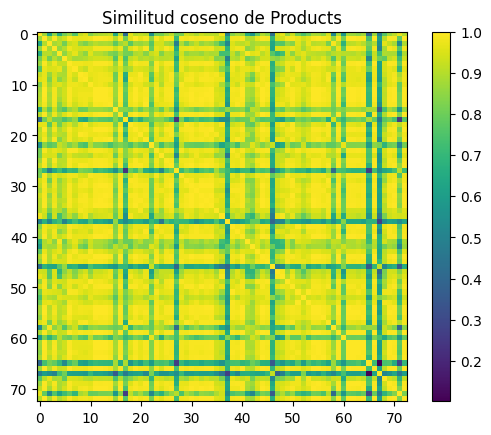

In [499]:
plt.imshow(product_similarity)
plt.title('Similitud coseno de Products')
plt.colorbar()
plt.show()

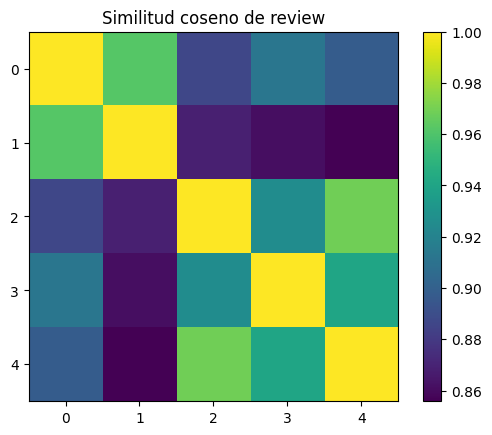

In [500]:
plt.imshow(review_similarity)
plt.title('Similitud coseno de review')
plt.colorbar()
plt.show()

In [501]:
product_similarity_df = pd.DataFrame(product_similarity, index =tabla_pivot2.index, columns =tabla_pivot2.index)
product_similarity_df.head()

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,pet_shop,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas
product_category_name,,,,,,,,,,,,,,,,,,,,,
agro_industria_e_comercio,1.000000,0.867776,0.641438,0.856162,0.659319,0.813848,0.863940,0.763397,0.921018,0.954256,...,0.844303,0.875970,0.404174,0.868691,0.482906,0.762632,0.865344,0.909114,0.971625,0.897793
alimentos,0.867776,1.000000,0.895884,0.991139,0.901279,0.934298,0.993727,0.971438,0.967118,0.969198,...,0.995370,0.995350,0.735244,0.997984,0.604188,0.905210,0.994498,0.991536,0.784321,0.996662
alimentos_bebidas,0.641438,0.895884,1.000000,0.879311,0.905072,0.807445,0.924418,0.944572,0.859416,0.823764,...,0.932866,0.903429,0.816987,0.900863,0.549676,0.963747,0.921991,0.880826,0.523378,0.890820
artes,0.856162,0.991139,0.879311,1.000000,0.855789,0.898928,0.977153,0.952836,0.941249,0.951683,...,0.982837,0.978337,0.785864,0.982336,0.504286,0.883637,0.988995,0.972452,0.761281,0.984235
artes_e_artesanato,0.659319,0.901279,0.905072,0.855789,1.000000,0.848137,0.920372,0.968122,0.893037,0.846667,...,0.918516,0.898204,0.702100,0.920400,0.724915,0.891067,0.887288,0.887013,0.619507,0.888897


In [502]:
review_similarity_df = pd.DataFrame(review_similarity, index =tabla_pivot2.columns, columns =tabla_pivot2.columns)
review_similarity_df.head()

review_score,1,2,3,4,5
review_score,,,,,
1,1.000000,0.962025,0.886467,0.912293,0.897676
2,0.962025,1.000000,0.868571,0.861098,0.855828
3,0.886467,0.868571,1.000000,0.925728,0.968503
4,0.912293,0.861098,0.925728,1.000000,0.940814
5,0.897676,0.855828,0.968503,0.940814,1.000000


In [503]:
product_similarity_df['alimentos'].sort_values()

product_category_name
seguros_e_servicos                               0.604188
fashion_roupa_infanto_juvenil                    0.676235
la_cuisine                                       0.688427
dvds_blu_ray                                     0.703212
portateis_cozinha_e_preparadores_de_alimentos    0.735244
                                                   ...   
relogios_presentes                               0.997984
beleza_saude                                     0.998212
perfumaria                                       0.998758
pcs                                              0.998991
alimentos                                        1.000000
Name: alimentos, Length: 73, dtype: float64

In [504]:
review_similarity_df[1].sort_values(ascending = False)

review_score
1    1.000000
2    0.962025
4    0.912293
5    0.897676
3    0.886467
Name: 1, dtype: float64

In [505]:
def top_products (producto):
    count = 1
    print('El producto escogido es : {}. Le recomendamos : '.format(producto))
    for product in product_similarity_df.sort_values(producto, ascending = False).index[1:11]:
        print('No {} : {}'.format(count, product))
        count +=1

In [506]:
top_products('la_cuisine')

El producto escogido es : la_cuisine. Le recomendamos : 
No 1 : construcao_ferramentas_ferramentas
No 2 : seguros_e_servicos
No 3 : artigos_de_festas
No 4 : moveis_colchao_e_estofado
No 5 : pc_gamer
No 6 : fraldas_higiene
No 7 : eletrodomesticos
No 8 : artes_e_artesanato
No 9 : moveis_quarto
No 10 : bebidas
